In [16]:
import io 
import re
import string
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from  nltk.stem.snowball import ItalianStemmer

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
data = pd.read_csv("/content/drive/MyDrive/appunti/sanremoDataset.csv", delimiter=";", encoding='utf8')
data.head()

,cantante,titolo,testo
0,Aiello,Ora,Ora ora ora ora Mi parli come allora Quando an...
1,Annalisa,Dieci,Cos’è che ti ho promesso Non so Non mi ricordo...
2,Arisa,Potevi fare di più,Lasciarsi adesso non fa più male non è importa...
3,Bugo,E invece sì,Le metropolitane vanno molto veloci I giornali...
4,Colapesce e Dimartino,Musica leggerissima,Se fosse un’orchestra a parlare per noi Sarebb...


In [ ]:
# stopwords della lingua italia per il preprocessing
stop_words_data = pd.read_csv('/content/drive/MyDrive/appunti/stopwords-it.txt', sep=" ", header=None)
stop_words = list(stop_words_data[0])

In [37]:
# funzione per preprocessing
stemmer = ItalianStemmer()
def clean_text(text):
  output_str = re.sub('[^A-Za-zàèéìòù]+', ' ', text)
  output_str_lower =re.sub('[A-Z]+', lambda m: m.group(0).lower(), output_str)
  output = ' '.join(w for w in output_str_lower.split() if w not in stop_words) 
  return output

In [66]:
def color_func(word, *args, **kwargs):
  return '#FFFF00' # giallo

def show_wordcloud(data, title = None,oneColor="No",):

  if oneColor== "Yes":
    wordcloud = WordCloud(
        background_color='black',
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1,
        color_func=color_func
).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12), dpi=90)
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=16)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

  else:
    wordcloud = WordCloud(
        background_color='black',
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1,
).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12), dpi=90)
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=16)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

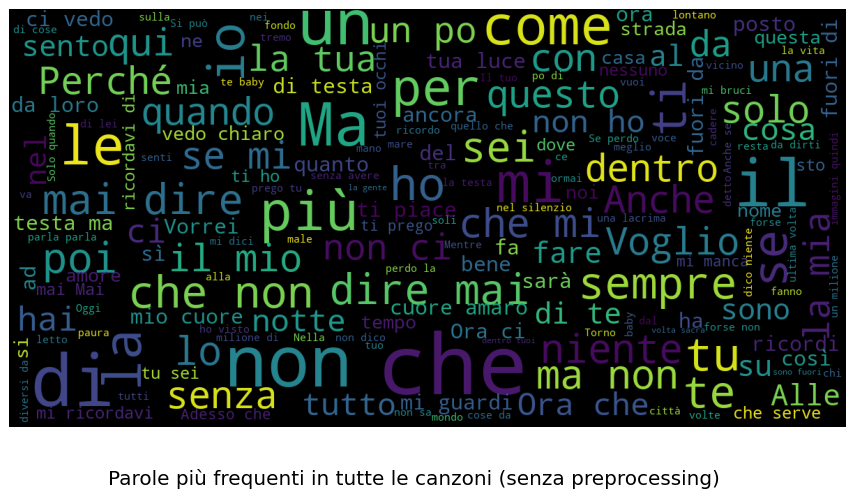

In [67]:
show_wordcloud(list(data['testo']), 'Parole più frequenti in tutte le canzoni (senza preprocessing)')

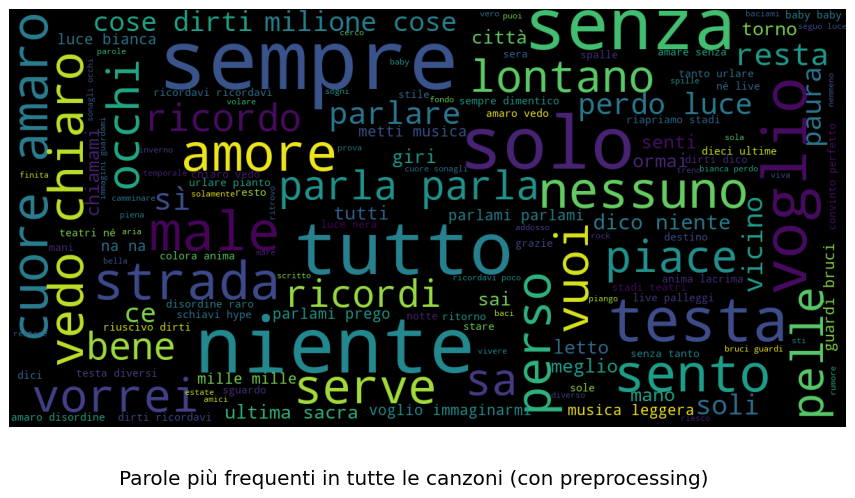

In [68]:
data['testo_preprocessed'] = data['testo'].apply(lambda x: clean_text(x)) 
show_wordcloud(list(data['testo_preprocessed']), 'Parole più frequenti in tutte le canzoni (con preprocessing)')

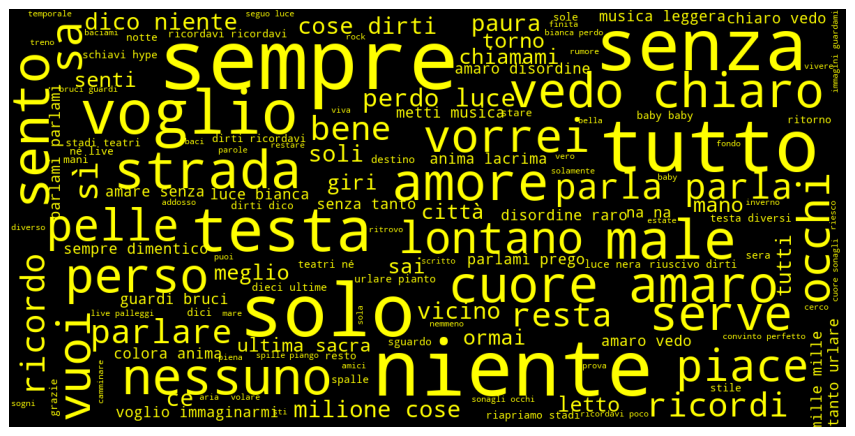

In [69]:
# wordcloud finale utilizzata per la foto
show_wordcloud(list(data['testo_preprocessed']), '', "Yes")